# Лабораторная работа 5. Библиотеки. Научный Python 1.
# Линейные и нелинейные уравнения.

Загрузим необходимые для работы библиотеки: 

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.optimize import root

import math
import time
import pylab

init_printing()
%matplotlib notebook

# 1. Линейная алгебра

Массивы бывают:

1. Одномерные (векторы)
2. Двумерные (матрицы)
3. Многомерные.

Все элементы массива (в контексте библиотек линейной алгебры Python) должны принадлежать к одному типу данных.

Создадим одномерный массив из списка при помощи функции `numpy.array()`:

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

Создадим двумерный массив из списка при помощи функции `numpy.array()`. Обратите внимание на скобки:

In [3]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Существуют ещё и специальные методы. Например, `numpy.zeros()` создаёт массив нулей:

In [4]:
np.zeros(3)

array([0., 0., 0.])

Для создания единичной матрицы используется функция `numpy.eye()`:

In [5]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Для получения случайных чисел из нормального распределения используют функцию `random()` из модуля `numpy.random`. Для создания матрицы случайных чисел надо передать функции два числа, задающих диапазон случайных значений `[10, 100]` и размерность матрицы `(3, 5)`:

In [6]:
A = np.random.uniform(10, 100, (3, 5))
A

array([[80.65126781, 35.22792924, 99.35255765, 31.64141896, 47.58318915],
       [25.09892421, 24.0596081 , 27.91889912, 21.10960914, 16.00167995],
       [68.6278974 , 30.26158258, 43.21354272, 74.13838075, 78.7753654 ]])

К эллементам массива можно обращаться по индексу:

In [7]:
A[0, 0:5:2]  #  arr[<номер строки>, <от ... столбца>:<до ... столбца>:<шаг>]

array([80.65126781, 99.35255765, 47.58318915])

Чтобы вывести все элементы строки или столбца, можно написать `[:]`:

In [8]:
A[:, 0:5:2]

array([[80.65126781, 99.35255765, 47.58318915],
       [25.09892421, 27.91889912, 16.00167995],
       [68.6278974 , 43.21354272, 78.7753654 ]])

К массиву можно применять арифметические и логические операции, при этом они будут применены к каждому элементу:

In [9]:
A < 50

array([[False,  True, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [False,  True,  True, False, False]])

# Основные операции над матрицами и решение СЛАУ

In [10]:
# определение матрицы
A = np.array([[1, 2], [3, 4]])
x0 = [5.6, 6.1]
b = np.dot(A, x0)

# вычисление определителя матрицы
detA = linalg.det(A)

# вычисление ранга матрицы
rankA = np.linalg.matrix_rank(A)

# вычисление обратной матрицы
B = linalg.inv(A)

# вычисление суммы матриц
C = A + B

# вычисление произведения матриц
D = np.dot(A, B)

# решение СЛАУ A * x = b с помощью обратной матрицы 
x = np.dot(linalg.inv(A), b) 
print('x =', x)

# проверка решения
errx = np.dot(A, x) - b

x = [5.6 6.1]


Вычисление определителя матрицы:

In [11]:
detA = linalg.det(A)
detA

# Упражнение 1. Норма в норме.

Напишите программу для вычисления норм вещественных матриц:

$$ \|A\|_1 = \underset{1 \leq j \leq n}{max}\overset{n}{\underset{i=1}{\sum}}|a_{ij}|, \quad
\|A\|_E = \left( \overset{n}{\underset{i,j=1}{\sum}}|a_{ij}|^2 \right)^{1/2}, \quad
\|A\|_\infty = \underset{1 \leq i \leq n}{max}\overset{n}{\underset{j=1}{\sum}}|a_{ij}|. $$

На основе экспериментов со случайными матрицами при различных $n$ убедитесь в выполнении неравенств:

$$ \frac{1}{\sqrt{n}} \|A\|_\alpha \leq \|A\|_E \leq \sqrt{n}\|A\|_\alpha, \quad \alpha = 1, \infty.$$

In [12]:
def norm1(A):
    s = []
    for i in range(len(A)):
        k = 0
        for j in range(len(A)):
            k += abs(A[j][i])
        s.append(k)
    return max(s)

In [13]:
def normE(A):
    s = 0
    for j in range(len(A)):
        for i in range(len(A)):
            s += (A[i][j]) ** 2
    return s ** 0.5

In [14]:
def normINF(A):
    s = []
    for j in range(len(A)):
        s.append(sum(abs(A[j])))
    return max(s)

In [15]:
def testExpression(A):
    n = len(A)
    if ((1 / (n ** 0.5)) * norm1(A) <= normE(A) <= (n ** 0.5) * norm1(A)) and ((1 / (n ** 0.5)) * normINF(A) <= normE(A) <= (n ** 0.5) * normINF(A)):
        return True
    return False

In [16]:
A = np.array([[1, 2], [3, 4]])

# заметим, что n - максимальное количество как столбцов, так и строк
if len(A) == len(A[0]):
    print(norm1(A))
    print(normE(A))
    print(normINF(A))
else:
    print('Матрица не квадратная!')
    
# теперь поэкспериментируем

for i in range(10):
    A = np.random.uniform(1, 100, (i + 1, i + 1))
    # print()
    # print(A)
    print(testExpression(A))

6
5.477225575051661
7
True
True
True
True
True
True
True
True
True
True


# 2. Символьные вычисления и исследование функций.

# 2.1. Число $\pi$

In [17]:
# Выыедем заданное колличество знаков числа pi
npi = 70;
print('Выведем %i знаков числа пи:' % npi, pi.n(npi))

Выведем 70 знаков числа пи: 3.141592653589793238462643383279502884197169399375105820974944592307816


# 2.2. Многочлены и рациональные функции

In [18]:
# Создадим несколько символьных переменных
x, y, z, a, b = symbols('x y z a b')

Проверим фомулу бинома Ньютона, пусть $x=(a+b)^n$.

SymPy умеет раскрывать скобки, для этого используется функция `sympy.expand()`:

In [19]:
n = 6
x = (a + b) ** n
y = expand(x)
print(x, '=', y)

(a + b)**6 = a**6 + 6*a**5*b + 15*a**4*b**2 + 20*a**3*b**3 + 15*a**2*b**4 + 6*a*b**5 + b**6


In [20]:
# определим степень многочлена по b
print('Полином имеет порядок %i по переменной b.' % degree(y, b))
# и сгруппируем члены со степенями  b
print('Члены с этой переменной имеют вид:')
collect(y, b)

Полином имеет порядок 6 по переменной b.
Члены с этой переменной имеют вид:


In [21]:
# раскрытое выражение можно свернуть обратно
z = factor(y)
z

SymPy умеет сокращать символьное отношение, для этого используется функция `sympy.cancel()`:

In [22]:
x, y, z, a, b = symbols('x y z a b')
x = (a ** 3 - b ** 3) / (a ** 2 - b ** 2)
print(x, '=', cancel(x))

(a**3 - b**3)/(a**2 - b**2) = (a**2 + a*b + b**2)/(a + b)


Можно приводить дроби к общему знаменателю, используя `sympy.together()`:

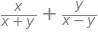

In [23]:
x, y, z, a, b = symbols('x y z a b')
a = y / (x - y) + x / (x + y)
a

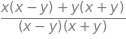

In [24]:
together(a)

Можно попытаться переписать выражение в наиболее простом виде, для этого используется функция `sympy.simplify()`:

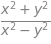

In [25]:
simplify(a)

Можно разложить выражение на элементарные дроби по отношению к `x`:

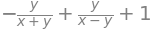

In [26]:
b = apart(a, x)
b

т.к.:

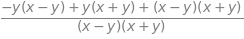

In [27]:
together(b)

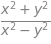

In [28]:
cancel(together(b))

# 2.3 Решение алгебраических уравнений

In [29]:
a, b, c, d, e, f = symbols('a b c d e f')

Как известно, алгебраические уравнения до 4 степени включительно имеют решение в радикалах:

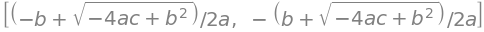

In [30]:
solve(a * x ** 2 + b * x + c, x)

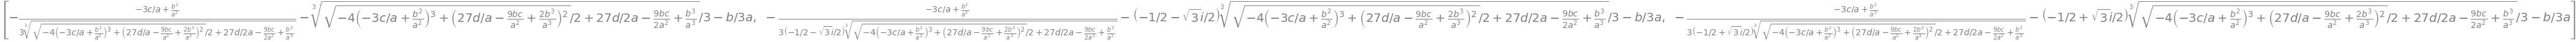

In [31]:
solve(a * x ** 3 + b * x ** 2 + c * x + d, x)

Функция `sympy.roots` возвращает численное значение корней многочлена с их множественностями.

In [32]:
sol = roots(x ** 3 - 3 * x + 2, x)
sol

In [33]:
# обратите внимание на тип:
type(sol)

dict

# 2.4. Пределы

Пусть задана числовая последовательность:
$$x_{n}=\frac{5n^2+2n}{7n^2-3n}$$

In [34]:
n = symbols('n')
xn = (5 * n ** 2 + 2 * n) / (7 * n ** 2 - 3 * n)

Рассмотрим разность двух членов последовательности $x_{n+1}-x_{n}$:

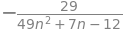

In [35]:
xnn = simplify(xn.subs({n : n + 1}) - xn)
xnn

Или, что то же самое:

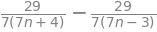

In [36]:
xnn = apart(xnn, n)
xnn

In [38]:
print('Последовательность ' + 'не ' * int(bool(xnn.subs({n : 1}) > 0)) + 
      'является убывающей.')

Последовательность является убывающей.


Вычислим предел последовательности:

In [39]:
LimXn = limit(xn, n, oo);
print('Предел последовательности xn равен:', LimXn)

Предел последовательности xn равен: 5/7


# Пример. Вычисление предела с помощью критерия Коши

Критерий Коши: последовательность сходится, если для любого $\epsilon$ существует такое N, что для двух любых номеров $m,n>N$ верно $|x_{n}-x_{m}|<\epsilon$.

In [40]:
def Cauchy_convergence(xn, eps):
    for j in range(100, 1000): 
        xn1 = xn.subs({n : j - 1}).n()
        xn2 = xn.subs({n : j}).n()
        if (abs(xn2 - xn1) < eps): 
            break
    return abs(xn2 - xn1), j

In [41]:
# зададим величину эпсилон
eps = 1.e-6

XnXn, N = Cauchy_convergence(xn, eps)
        
LimXnNum = xn.subs({n : N}).n()

In [42]:
print('Предел числовой последовательности xn (аналитически) равен:', float(LimXn))
print('Предел числовой последовательности xn (по кр. Коши при ' +
      'eps =%12.5e, N = %i) равен:' % (eps, N), LimXnNum)
print('Разность этих значений равна:', abs(float(LimXn)-LimXnNum))

Предел числовой последовательности xn (аналитически) равен: 0.7142857142857143
Предел числовой последовательности xn (по кр. Коши при eps = 1.00000e-06, N = 771) равен: 0.715053763440860
Разность этих значений равна: 0.000768049155145945


# 2.5. Производная

Рассмотрим функцию $y = x^2$ и приращение аргумента $dx$, приводящее к приращению функции $dy$:

In [43]:
x, y, dx, dy = symbols('x y dx dy')
y = x ** 2
dy = y.subs({x : x + dx}) - y.subs({x : x})
print('y =', y)
print('dy =', dy)

y = x**2
dy = -x**2 + (dx + x)**2


Найдём предел отношения $dy/dx$ при $dx$, стремящемся к 0:

In [44]:
dydx = limit(dy/dx,dx,0)
print('dydx =', dydx)

dydx = 2*x


**Определение.** Такой предел называют производной функции $y(x)$ по $x$.

# Упражнение 2. Производные как предел

Найдите с помощью предела производные следующих функций:

$$ y = sin(x), \quad y=ln(x), \quad y=6sin(3x)-tan(x^2)+e^{6x}.$$

In [45]:
x, y, dx, dy = symbols('x y dx dy')

def derCounter(y):
    dy = y.subs({x : x + dx}) - y.subs({x : x})
    dydx = limit(dy / dx, dx, 0)
    return dydx

In [46]:
y1 = sin(x)
dydx1 = derCounter(y1)

y2 = ln(x)
dydx2 = derCounter(y2)

y3 = 6 * sin(3 * x) - tan(x ** 2) + exp(6 * x)
dydx3 = derCounter(y3)

print(dydx1, dydx2, dydx3, sep = '\n')

cos(x)
1/x
-2*x*tan(x**2)**2 - 2*x + 6*exp(6*x) + 18*cos(3*x)


Можно находить производную напрямую при помощи `sympy.diff`:

In [47]:
x, y, a = symbols('x y a')

f = x * sin(x + y)

# Вычислим частные производные функции:
fx = diff(f, x)
fy = diff(f, y)
print('Производные функции f(x,y) по x:', fx);
print('Производные функции f(x,y) по y:', fy);

# Вторая производная по x и первая по y
fxxy = diff(a, x, 2, y);
print('Производные функции f(x,y) по x и y:', fxxy);

Производные функции f(x,y) по x: x*cos(x + y) + sin(x + y)
Производные функции f(x,y) по y: x*cos(x + y)
Производные функции f(x,y) по x и y: 0


# Упражнение 3. Производные

Проверьте правильность найденных ранее с помощью предела производных.

In [48]:
f = x * sin(x + y)

print(simplify(derCounter(f) - diff(f, x)))

0


# 3. Нелинейные уравнения и системы.

# 3.1. Алгоритмы для решения нелинейного уравнения 

Нас интересуют задачи вида $f(x) = 0$.

Пусть есть некоторая функция: $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$.

In [49]:
def f(x):
    return ((1.0 + x + x**2) * exp(-x) + sin(x+0.1) - 1.0)

Построим график этой функции:

<IPython.core.display.Javascript object>


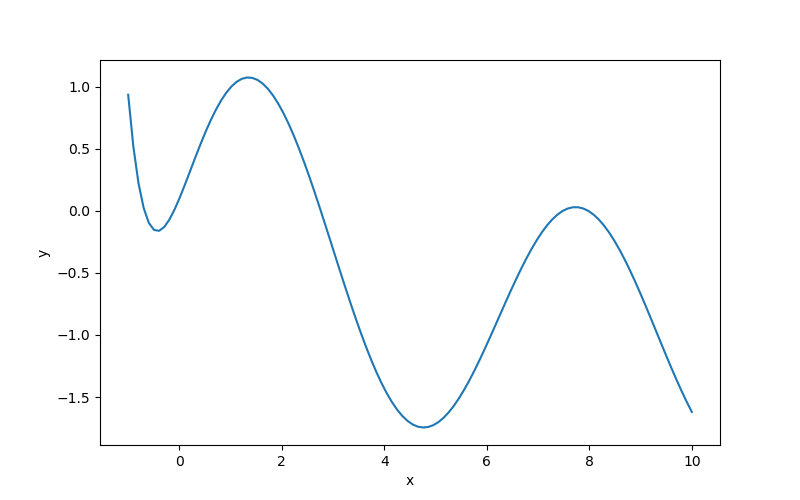

In [50]:
A = -1.0
B =  10.0
N =  110
Y = np.zeros((N))
X = np.linspace(A, B, N)
for i in range(N): 
    Y[i] = f(X[i])

plt.figure(figsize = (8, 5))
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()

Очевидно, что корень может находиться толькро между точками `a` и `b`, для которых справедливо:

$f(a)>0, f(b)<0$ или $f(a)>0, f(b)<0$, т.е. $f(a)\cdot f(b)<0$.

Найдём такие точки `a` и `b`, перебирая значения `x` в некотором интервале:

In [51]:
n = 30
AB = np.zeros((2, n))
xab = np.linspace(A, B, n)
ia = 0
for i in range(n - 1):
    if f(xab[i]) * f(xab[i + 1]) < 0:
        AB[0][ia] = xab[i]
        AB[1][ia] = xab[i + 1]
        print('\t %i \t %.10e \t %.10e' % (ia, AB[0][ia], AB[1][ia]))
        ia = ia + 1
print('Найдено %i интервалов локализации корня.' % ia)

	 0 	 -1.0000000000e+00 	 -6.2068965517e-01
	 1 	 -2.4137931034e-01 	 1.3793103448e-01
	 2 	 2.4137931034e+00 	 2.7931034483e+00
	 3 	 7.3448275862e+00 	 7.7241379310e+00
	 4 	 7.7241379310e+00 	 8.1034482759e+00
Найдено 5 интервалов локализации корня.


<IPython.core.display.Javascript object>


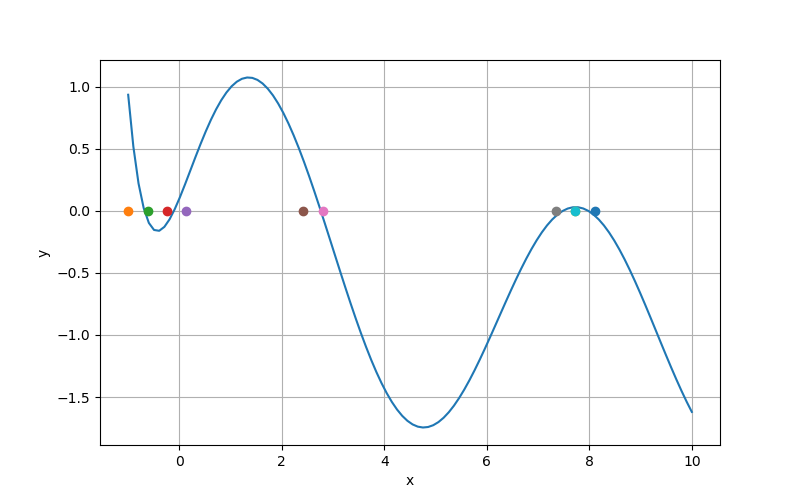

In [52]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 3.2 Метод деления отрезка пополам (метод бисекции)

In [53]:
def bisection(f, x1, x2, pr = 0, tol = 1.0e-10):
    """
    Ищет корень уравнения f(x)=0
    на отрезке [x1, x2] методом дихотомии (бисекции).
    Значения функций на концах отрезка не могут иметь один знак.
    :param f: - функция
    :param x1: - левая точка мнтервала
    :param x2: - правая точка мнтервала
    :param pr: - параметр выдачи итераций (pr=0 - не выводить итерации, 
                                           pr=1 - выводить итерации)
    :param tol: - точность
    :return:
    """
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2 > 0.:
        print('f(x1) and f(x2) can not have the same signs')
    n = int(math.ceil(math.log(abs(x2 - x1) / tol) / math.log(2.)))
    
    Error = abs(x1 - x2)
    for i in range(n):
        Error0 = Error
        x3 = 0.5 * (x1 + x2)
        f3 = f(x3)
        if f2 * f3 < 0.:
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3
        Error = abs(x1 - x2)
        k = log(Error) / log(Error0)
        if pr > 0:
            print('итерация:\t%i \t%.6e \t%.3f' % (i, Error, k))
    return (x1 + x2) / 2

In [54]:
xRoot = np.zeros((2, ia))

for i in range(ia): 
    xRoot[0][i] = bisection(f, AB[0][i], AB[1][i], pr = 0)
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' % 
          (i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -6.8256428198e-01 	 f(root[0]) =  -5.8010485304e-11
	 1 	 root[1] =  -1.0653060478e-01 	 f(root[1]) =  -1.5933809827e-11
	 2 	 root[2] =   2.7584180781e+00 	 f(root[2]) =  -1.0324963107e-11
	 3 	 root[3] =   7.4839086268e+00 	 f(root[3]) =   1.6826540161e-12
	 4 	 root[4] =   7.9776600799e+00 	 f(root[4]) =  -1.1343148643e-12


<IPython.core.display.Javascript object>


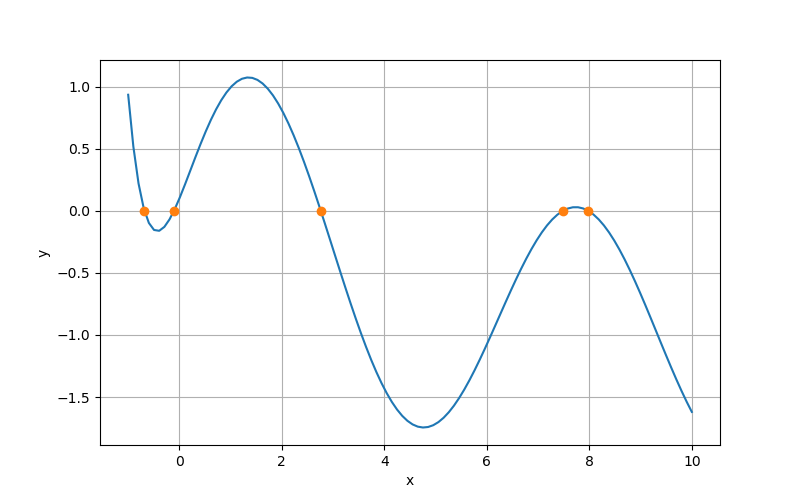

In [55]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0, :], xRoot[1, :], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 3.3 Метод Ньютона

Вычислим производную заданной функции:

In [56]:
x = symbols('x')

F = (1.0 + x + x ** 2) * exp(-x) + sin(x + 0.1) - 1.0;

FX = diff(F,  x)
FX

In [57]:
def fx(a):
    return FX.subs({x : a}).n()

In [58]:
def newton(f, x, pr = 0, tol = 1.0e-10):   
    Error = 2
    i = 0
    while Error > tol:
        Error0 = Error
        x0 = x
        x = x0 - f(x0) / fx(x0)
        Error = math.fabs(x - x0)
        k = log(Error) / log(Error0)
        i = i + 1
        if pr > 0:
            if i > 1: print('итерация:\t%i \t%.6e \t ' % (i, Error), k)
            else: print('итерация:\t%i \t%.6e \t ' % (i, Error))
    return x

Рассмотрим в качестве начального приближения левые точки отрезков локализации:

In [59]:
xRootA = np.zeros((2, ia))

for i in range(ia): 
    xRootA[0][i] = newton(f, AB[0][i], pr = 0)
    xRootA[1][i] = f(xRootA[0][i])
    print('\t %i \t root(%i) = %18.10e \t f(root[%i]) = %18.10e' %
          (i, i, xRootA[0][i], i, xRootA[1][i]))   

	 0 	 root(0) =  -6.8256428202e-01 	 f(root[0]) =  -2.2204460493e-16
	 1 	 root(1) =  -1.0653060476e-01 	 f(root[1]) =   0.0000000000e+00
	 2 	 root(2) =   2.7584180781e+00 	 f(root[2]) =   0.0000000000e+00
	 3 	 root(3) =   7.4839086268e+00 	 f(root[3]) =  -1.1102230246e-16
	 4 	 root(4) =   2.7584180781e+00 	 f(root[4]) =   0.0000000000e+00


<IPython.core.display.Javascript object>


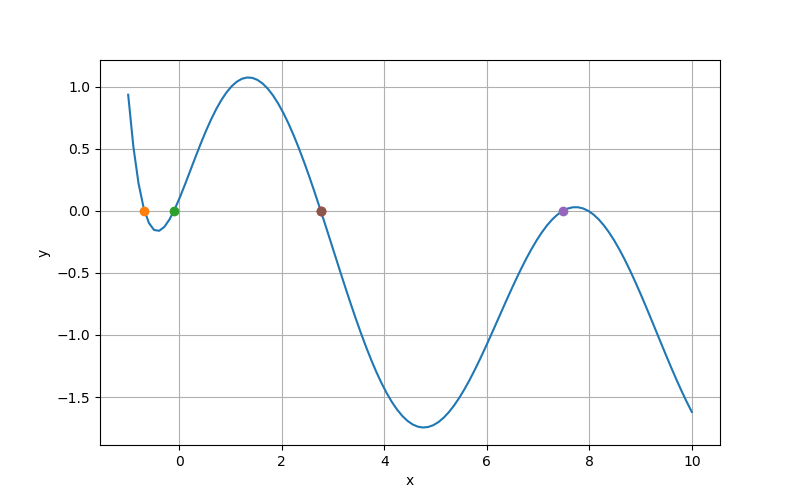

In [60]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(xRootA[0][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Рассмотрим в качестве начального приближения правые точки отрезков локализации:

In [61]:
xRootB = np.zeros((2, ia))

for i in range(ia): 
    xRootB[0][i] = newton(f, AB[1][i], pr = 0)
    xRootB[1][i] = f(xRootB[0][i])
    print('\t %i \t root(%i) = %18.10e \t f(root[%i]) = %18.10e' %
          (i, i, xRootB[0][i], i, xRootB[1][i]))

	 0 	 root(0) =  -6.8256428202e-01 	 f(root[0]) =   0.0000000000e+00
	 1 	 root(1) =  -1.0653060476e-01 	 f(root[1]) =   2.2204460493e-16
	 2 	 root(2) =   2.7584180781e+00 	 f(root[2]) =   0.0000000000e+00
	 3 	 root(3) =   2.7584180781e+00 	 f(root[3]) =   0.0000000000e+00
	 4 	 root(4) =   7.9776600799e+00 	 f(root[4]) =   2.2204460493e-16


<IPython.core.display.Javascript object>


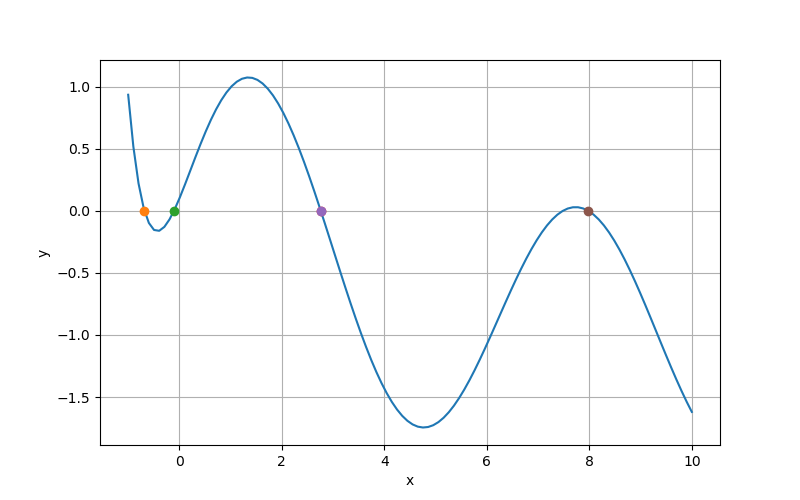

In [62]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(xRootB[0][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Видно, что решение из крайних точек отрезков локализации корня сходится к разным решениям. Это обусловленно локальными свойствами функции — поведением производной. 

# Решение системы нелинейных уравнений

# 3.4. Методом Ньютона 

Нас интересуют задачи вида:
\begin{cases}
   f(x_1,x_2) = 0
   \\
   g(x_1,x_2) = 0
\end{cases}

Рассмотрим систему:
\begin{cases}
   4(x_2-1)^2+(x_1-1)^2-1 = 0
   \\
   x_2 - x_1 sin(25x_1) = 0
\end{cases}

Построим график этой функции:

In [63]:
def f1(x1, x2):
    return (4.0 * (x2 - 1.0) ** 2 + (x1 - 1.0) ** 2 - 1.0)

def f2(x1, x2):
    return (x2 - x1 * math.sin(25.0 * x1))

def X22(x1):
    return x1 * math.sin(25.0 * x1)

def X21p(x1):
    return (math.sqrt((1.0 - (x1 - 1.0) ** 2) / 4.0) + 1.0)

def X21m(x1):
    return (- math.sqrt((1.0 - (x1 - 1.0) ** 2) / 4.0) + 1.0)

<IPython.core.display.Javascript object>


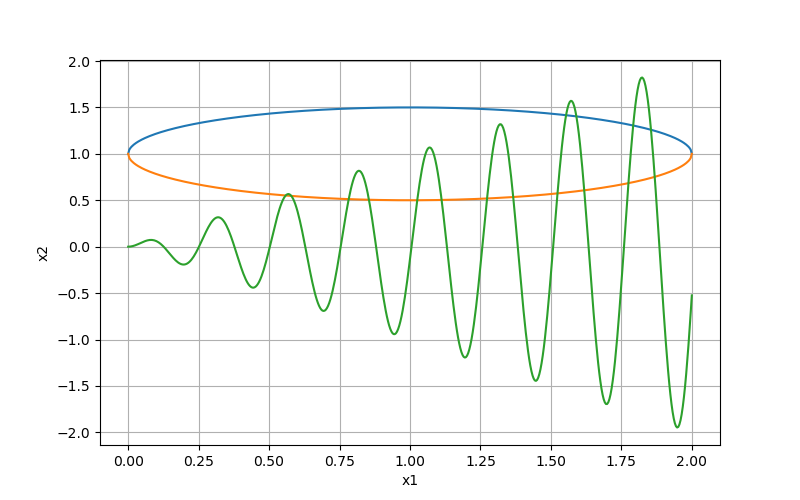

In [64]:
A = 0.0
B = 2.0
N = 500
y21p = np.zeros((N))
y21m = np.zeros((N))
y22 = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    y21p[i] = X21p(x[i])
    y21m[i] = X21m(x[i])
    y22[i]  =  X22(x[i])
    
plt.figure(figsize = (8, 5))  
plt.plot(x, y21p, x, y21m, x, y22)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

Вычислим производные этих функций и сформируем матрицу Якоби:

In [65]:
x1, x2 = symbols('x1, x2')
F1 = 4.0 * (x2 - 1.0) ** 2 + (x1 - 1.0) ** 2 - 1.0
F2 = x2 - x1 * sin(25.0 * x1)

Найдём частные производные: 
$$\frac{\partial f_1(x_1,x_2)}{\partial x_1}, \frac{\partial f_1(x_1,x_2)}{\partial x_2}, \frac{\partial f_2(x_1,x_2)}{\partial x_1}, \frac{\partial f_2(x_1,x_2)}{\partial x_2}$$

In [66]:
F1X1 = diff(F1,x1)
F1X1

In [67]:
F1X2 = diff(F1,x2)
F1X2

In [68]:
F2X1 = diff(F2,x1)
F2X1

In [69]:
F2X2 = diff(F2,x2)
F2X2

Сформируем иэ них матрицу Якоби:
$$J = 
\begin{pmatrix}
  \frac{\partial f_1(x_1,x_2)}{\partial x_1} \frac{\partial f_1(x_1,x_2)}{\partial x_2}\\
  \frac{\partial f_2(x_1,x_2)}{\partial x_1} \frac{\partial f_2(x_1,x_2)}{\partial x_2}
\end{pmatrix}
$$

In [70]:
J = Matrix([[F1X1, F1X2], [F2X1, F2X2]])
J

⎡             2⋅x₁ - 2.0               8.0⋅x₂ - 8.0⎤
⎢                                                  ⎥
⎣-25.0⋅x₁⋅cos(25.0⋅x₁) - sin(25.0⋅x₁)       1      ⎦

Программа для решения систем нелинейных уравнений методом Ньютона:

In [71]:
def NEWTON(n, fun, Jac, x0, pr = 0, tol = 1.0e-10): 
    x = np.zeros(n)
    b = np.zeros(n)
    A = np.zeros((n, n)) 
    dx = np.zeros(n)
    xStep = np.zeros((1000, n))
    Error = 2
    i = 0
    x[:] = x0[:]
    xStep[i][:]=x[:]
    while Error > tol and i < 999:
        Error0 = Error 
#        x0[:]=x[:]
        b = - fun(x)
        A = Jac(x)
        dx = np.dot(linalg.pinv(A), b)
        x[:] = x[:] + dx[:]
        Error = math.sqrt(np.dot(dx.T, dx))
        k = log(Error) / log(Error0)
        i = i + 1
        xStep[i][:] = x[:]
        if pr > 0:
            if i > 1: print('итерация:\t%i \t%.6e \t ' % (i, Error), k)
            else: print('итерация:\t%i \t%.6e \t ' % (i, Error))
    return x, xStep, i

Программы для вычсления значения функций и Якобиана:

In [72]:
def fun(x):
    f = np.zeros(2)
    f[0] = f1(x[0], x[1])
    f[1] = f2(x[0], x[1])
    return f 

def jac(x):
    JJ = J.subs({x1 : x[0], x2 : x[1]}).n()
    M = np.array([[float(JJ[0, 0]), float(JJ[0, 1])], [float(JJ[1, 0]), float(JJ[1, 1])]])
    return M

Выберем начальное приближение:

<IPython.core.display.Javascript object>


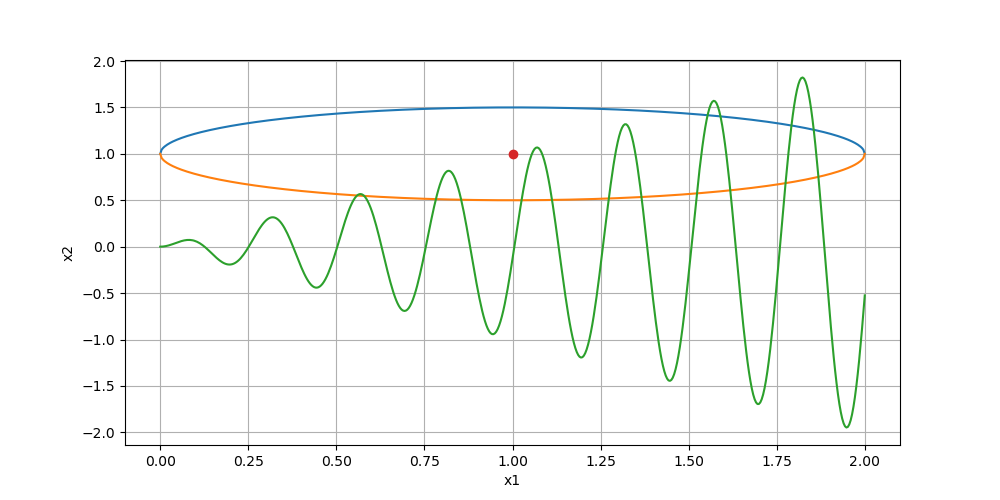

In [73]:
x10 = 1.0
x20 = 1.0

plt.figure(figsize = (10, 5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(x10, x20, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

Значение Якобиана в начальной точке:

In [74]:
jac([x10, x20])

array([[  0.        ,   0.        ],
       [-24.64771855,   1.        ]])

итерация:	1 	4.590368e-02 	 
итерация:	2 	1.157733e+02 	  -1.54213234310846
итерация:	3 	5.781208e+01 	  0.853853244788536
итерация:	4 	2.895555e+01 	  0.829577947827247
итерация:	5 	1.457551e+01 	  0.796058378510352
итерация:	6 	7.501045e+00 	  0.752065857991357
итерация:	7 	4.209086e+00 	  0.713258252709071
итерация:	8 	3.593178e+00 	  0.889922494684210
итерация:	9 	5.753870e+00 	  1.36811716209414
итерация:	10 	3.571702e+00 	  0.727505577957861
итерация:	11 	6.027617e+00 	  1.41107016068830
итерация:	12 	3.660230e+00 	  0.722311810062223
итерация:	13 	5.107937e+00 	  1.25684996804191
итерация:	14 	3.432073e+00 	  0.756173535401707
итерация:	15 	1.600977e+01 	  2.24884753150982
итерация:	16 	8.192444e+00 	  0.758406564582594
итерация:	17 	4.459068e+00 	  0.710788851394176
итерация:	18 	3.300310e+00 	  0.798705390876135
итерация:	19 	1.776853e+01 	  2.40987368604404
итерация:	20 	9.041318e+00 	  0.765198704252714
итерация:	21 	4.855652e+00 	  0.717658193672179
итерация:	22 	3.296960e+

<IPython.core.display.Javascript object>


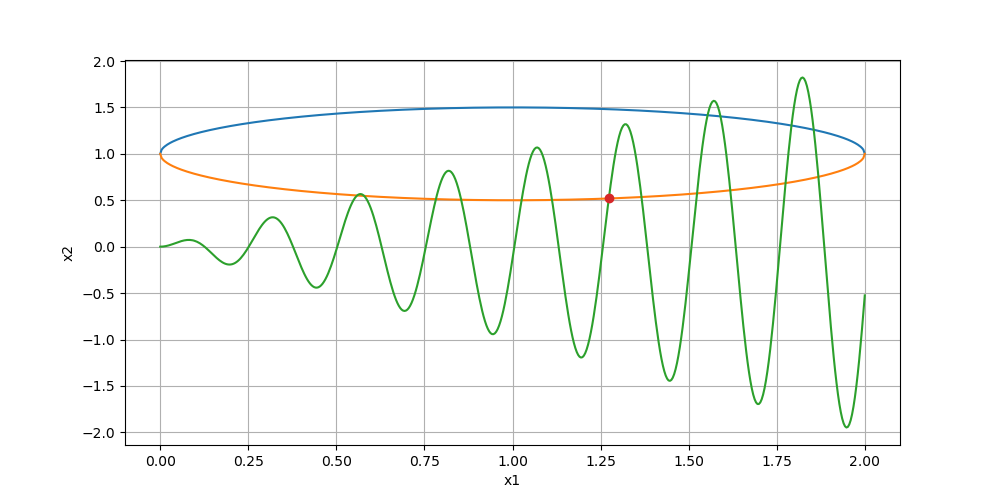

In [75]:
X0 = np.array([x10, x20])
sol, xStep, iStep = NEWTON(2, fun, jac, X0, pr = 1, tol = 1.0e-10)

print(' x1 = %12.6e \t x2 = %12.6e \t f1(x1,x2) = %12.6e \t f1(x1,x2) = %12.6e' %
      (sol[0], sol[1], f1(sol[0], sol[1]), f2(sol[0], sol[1]))) 

plt.figure(figsize = (10, 5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(sol[0], sol[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


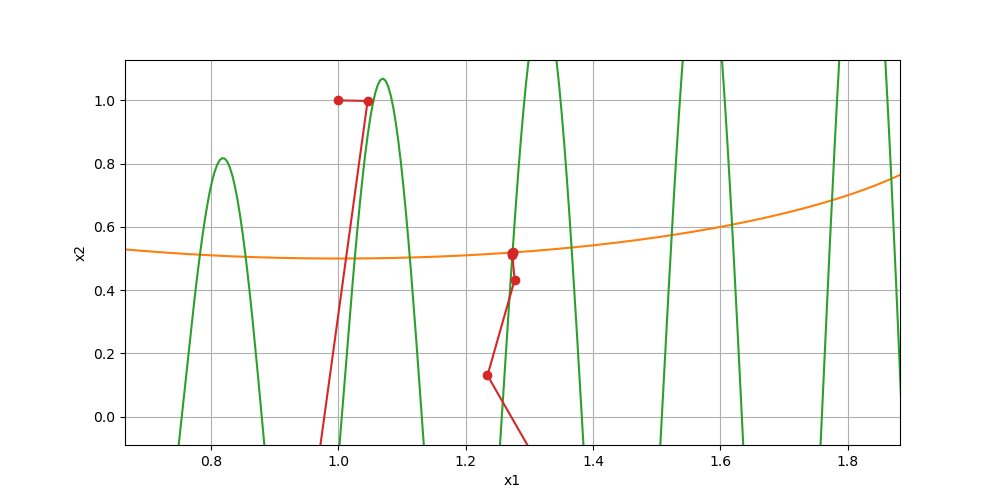

In [76]:
r = sol[:] - X0[:]
R = 1.1 * math.sqrt(np.dot(r.T, r))

plt.figure(figsize = (10, 5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(xStep[0 : iStep + 1, 0], xStep[0 : iStep + 1, 1], '-o')
plt.xlim(sol[0] - R, sol[0] + R)
plt.ylim(sol[1] - R, sol[1] + R)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# 3.5 Функция `scipy.optimize.root`

    fjac: array([[-0.0259308 ,  0.99966374],
       [-0.99966374, -0.0259308 ]])
     fun: array([-8.12432455e-10,  7.99603828e-10])
 message: 'The solution converged.'
    nfev: 10
    njev: 2
     qtf: array([2.49982769e-08, 2.33893479e-08])
       r: array([-23.42965678,   1.16954264,   4.03525888])
  status: 1
 success: True
       x: array([1.02568503, 0.50016496])


<IPython.core.display.Javascript object>


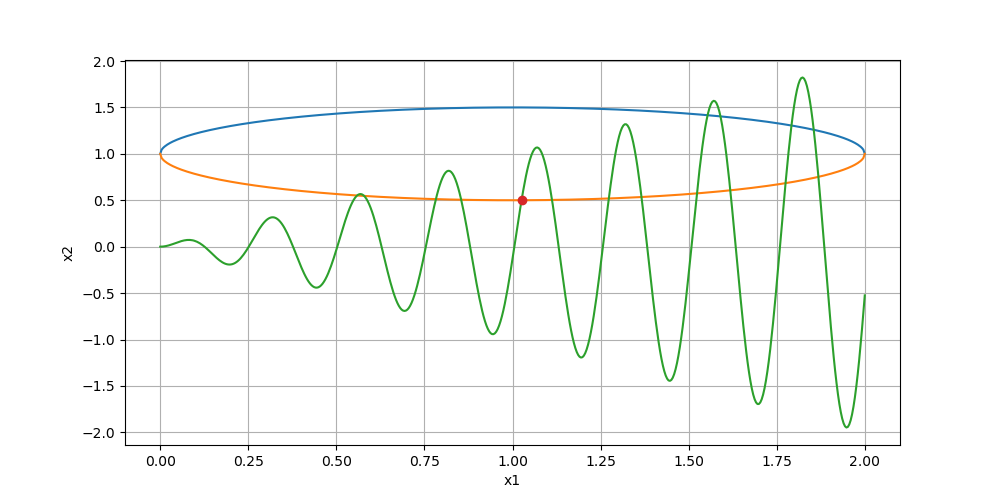

In [77]:
SOL = root(fun, X0, jac = jac, method = 'hybr')

print(SOL)

plt.figure(figsize = (10, 5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(SOL.x[0], SOL.x[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# 4. Алгоритмы минимизации нелинейной функции одной переменной 

Нас интересуют задачи вида: $f(x)$ → $min$.

Пусть есть некоторая функция $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$:

In [78]:
def f(x):
    return (1.0 + x + x ** 2) * math.exp(-x) + math.sin(x + 0.1) - 1.0

Построим график этой функции:

<IPython.core.display.Javascript object>


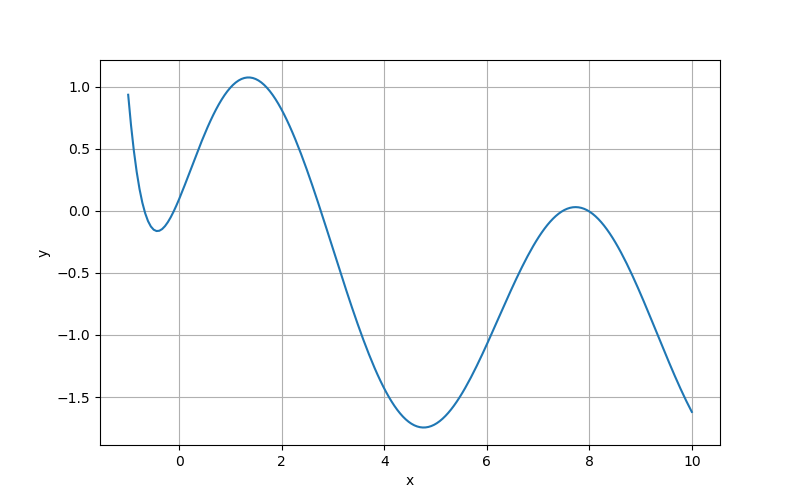

In [79]:
A = -1.0
B =  10.0
N =  200
Y = np.zeros((N))
X = np.linspace(A, B, N)
for i in range(N): 
    Y[i] = f(X[i])
    
plt.figure(figsize = (8, 5))  
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Очевидно, что экстремум может находиться только между точками `a` и `b`, для которых справедливо: $f'(a)>0, f'(b)<0$ - для максимума или $f'(a)>0, f(b)'<0$ - для минимума, т.е. $f'(a)\cdot f'(b)<0$. Найдём такие точки `a` и `b` переберая значения `x` в некотором интервале.

Вычислим производную:

In [80]:
x = symbols('x')
F = (1.0 + x + x ** 2) * exp(-x) + sin(x + 0.1) - 1.0
FX = diff(F,x)
FX

In [81]:
def fx(a):
    return FX.subs({x : a}).n()

In [82]:
n = 30
AB = np.zeros((2, n))
xab = np.linspace(A, B, n)
ia = 0
for i in range(n - 1):
    if fx(xab[i]) * fx(xab[i + 1])<0:
        AB[0][ia] = xab[i]
        AB[1][ia] = xab[i + 1]
        print('\t %i \t %.10e \t %.10e' %(ia, AB[0][ia], AB[1][ia]))
        ia = ia + 1
print('Найдено %i интервалов локализации экстремума.' % ia)

	 0 	 -6.2068965517e-01 	 -2.4137931034e-01
	 1 	 1.2758620690e+00 	 1.6551724138e+00
	 2 	 4.6896551724e+00 	 5.0689655172e+00
	 3 	 7.7241379310e+00 	 8.1034482759e+00
Найдено 4 интервалов локализации экстремума.


<IPython.core.display.Javascript object>


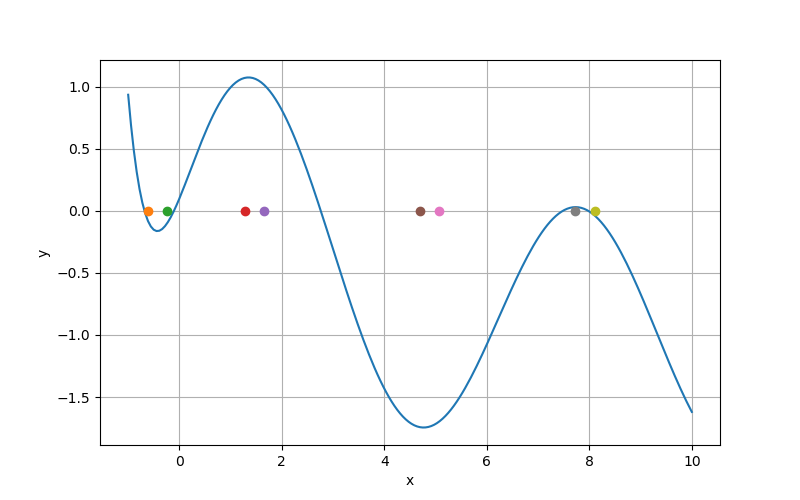

In [83]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


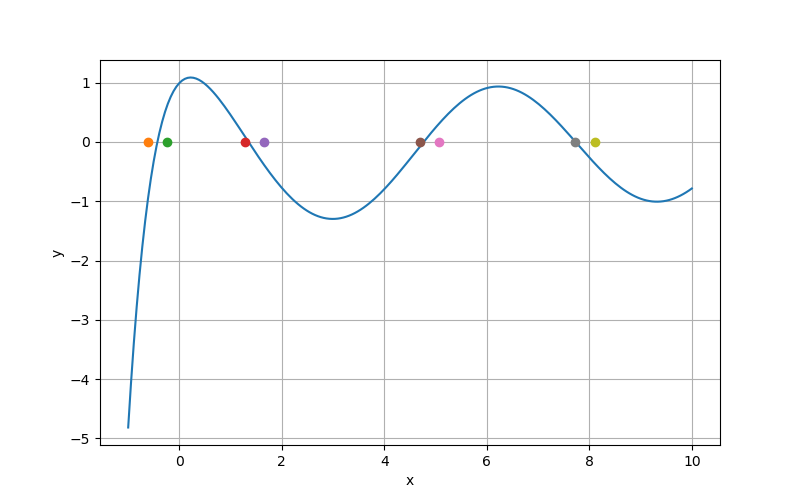

In [84]:
Yx = np.zeros((N))
for i in range(N): 
    Yx[i] = fx(X[i])

plt.figure(figsize = (8, 5))      
plt.plot(X, Yx, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 4.1 Метод дихотомии

In [85]:
def bisectionMin(f, x1, x2, mm = 0, tol = 1.0e-10):
    """
    Ищет корень уравнения f(x)=0
    на отрезке [x1, x2] методом дихотомии (бисекции).
    Значения функций на концах отрезка не могут иметь один знак.
    :param f: - функция
    :param x1: - левая точка мнтервала
    :param x2: - правая точка мнтервала
    :param mm: - параметр типа экстремума (pr=0 - mim, pr=1 - max)
    :param tol: - точность
    :return:
    """
    f1 = f(x1)
    f2 = f(x2)
    a = (1.0 + sqrt(5.0)) / 2.0
    
    Error = abs(x1 - x2)
    for i in range(n):
        Error0 = Error
        d = (x2-x1) * (1.0 / a - 1.0 / 2.0)
        x3 = 0.5 * (x1 + x2) + d
        x4 = 0.5 * (x1 + x2) - d
        f3 = f(x3)
        f4 = f(x4)
        if mm == 0:
            if f3 > f4:
                x2 = x3
                f2 = f3
            else:
                x1 = x4
                f1 = f4
        else:
            if f3 < f4:
                x2 = x3
                f2 = f3
            else:
                x1 = x4
                f1 = f4
        Error = abs(x1 - x2)
    return (x1 + x2) / 2

In [86]:
xRoot = np.zeros((2, ia))

for i in range(ia): 
    xRoot[0][i] = bisectionMin(f, AB[0][i], AB[1][i])
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %
          (i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -4.3018957759e-01 	 f(root[0]) =  -1.6356739805e-01
	 1 	 root[1] =   1.6551723119e+00 	 f(root[1]) =   1.0137704728e+00
	 2 	 root[2] =   4.7658265912e+00 	 f(root[2]) =  -1.7457293412e+00
	 3 	 root[3] =   8.1034481739e+00 	 f(root[3]) =  -3.7827206420e-02


<IPython.core.display.Javascript object>


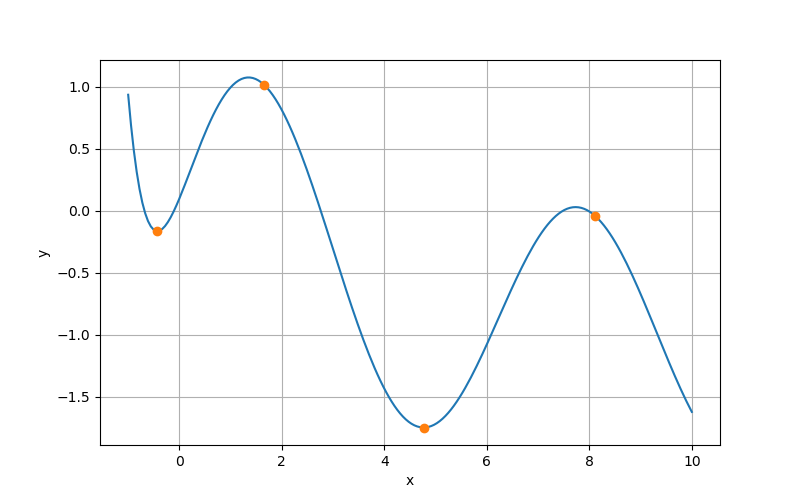

In [87]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [88]:
xRoot = np.zeros((2, ia))

for i in range(ia):
    xRoot[0][i] = bisectionMin(f, AB[0][i], AB[1][i], mm = 1)
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %
          (i, i, xRoot[0][i], i, xRoot[1][i]))

	 0 	 root[0] =  -6.2068955323e-01 	 f(root[0]) =  -7.5224927500e-02
	 1 	 root[1] =   1.3484834753e+00 	 f(root[1]) =   1.0743944863e+00
	 2 	 root[2] =   5.0689654153e+00 	 f(root[2]) =  -1.6978096976e+00
	 3 	 root[3] =   7.7311372238e+00 	 f(root[3]) =   2.9807497755e-02


<IPython.core.display.Javascript object>


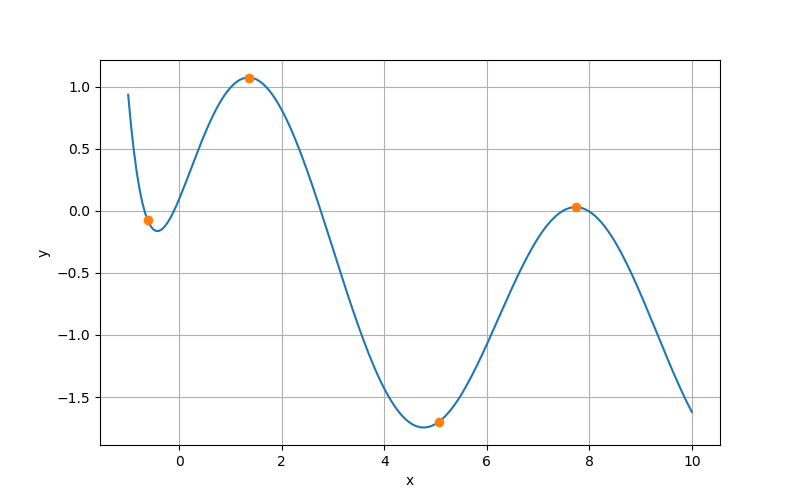

In [89]:
plt.figure(figsize = (8, 5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Экстремум функции нескольких переменных

Нас интересуют задачи вида $f(x_1,x_2)$ → $extr$

# 4.2 Функция `scipy.optimize.minimize`

In [90]:
from scipy.optimize import minimize, rosen, rosen_der

In [91]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method = 'Nelder-Mead', tol = 1e-6)
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

# Домашнее задание (базовое):

# Задание 1. Матрица Паскаля.

Напишите программу, вычисляющую матрицу Паскаля, элементы которой определяются следующим соотношением:

$$ a_{ij} = \frac{(i+j-2)!}{(i-1)!(j-1)!}, \quad i=1,2,..., n, \quad j=1,2,..., n. $$

In [92]:
from math import factorial as fc

n = int(input('Введите n: '))
a = np.eye(n)

for i in range(n):
    for j in range(n):
        a[i, j] = fc(i + j) / (fc(i) * fc(j))

print(a)

Введите n: 5
[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


# Задание 2.

Напишите программу, вычисляющую обратную матрицу на основе решения матричного уравнения:

$$ AX = E. $$

Найдите таким образом обратную матрицу для матрицы Паскаля.

In [93]:
x = linalg.inv(a)
print(x)

print(np.dot(a, x))

[[  5. -10.  10.  -5.   1.]
 [-10.  30. -35.  19.  -4.]
 [ 10. -35.  46. -27.   6.]
 [ -5.  19. -27.  17.  -4.]
 [  1.  -4.   6.  -4.   1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Задание 3

Напишите программу, реализующую [метод секущих](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%85%D0%BE%D1%80%D0%B4).

In [94]:
def f(x):
    return x ** 3 - 18 * x - 83

In [95]:
epsilon = float(input('Задайте точность: '))
xs = []
xs.append(float(input('Введите нулевую координату начального приближения: ')))
xs.append(float(input('Введите первую координату начального приближения: ')))

i = 1
while abs(xs[i] - xs[i - 1]) >= epsilon:
    xs.append(xs[i - 1] - f(xs[i - 1]) * (xs[i] - xs[i - 1]) / (f(xs[i]) - f(xs[i - 1])))
    i += 1
    
print(xs[-1])

Задайте точность: 0.001
Введите нулевую координату начального приближения: 4
Введите первую координату начального приближения: 6
5.705115340385571


# Задание 4

Постройте график и решите систему уравнений с помощью метода Ньютона и встроенной функции `sympy.root()`:

\begin{cases}
   x_1^2+(x_2-\sqrt{|x_1|})^2 - 1 = 0
   \\
   x_1^2 x_2^3 - 7 x_1^3 x_2^3 - 7 = 0
\end{cases}

In [27]:
x, x1, x2 = symbols('x, x1, x2')

F1 = x1**2 + (x2 - abs(x1)**0.5)**2 - 1
F2 = x1**2*x2**3  -  7*x1**3*x2**3  -  7

F1x1b = x1**4/(4*x2**2) + x1**3/(2*x2**2) + x1**2*(2*x2**2 - 1)/(4*x2**2) + x1*(-x2**2 - 1)/(2*x2**2) + (x2**4 - 2*x2**2 + 1)/(4*x2**2)
F1x1a = x1**4/(4*x2**2) + x1**3/(2*x2**2) + x1**2*(2*x2**2 - 1)/(4*x2**2) + x1*(3*x2**2 - 1)/(2*x2**2) + (x2**4 - 2*x2**2 + 1)/(4*x2**2)

def f1r(x1):
    return (1 - x1**2)**0.5 + abs(x1)**0.5 # но я не уверен, потому что опять сделал что-то не то

def f2r(x1):
    return (7 / (x1**2 - 7*x1**3)) ** (1/3)

def f1(x1, x2):
    return x1**2  +  (x2 - abs(x1))**2  -  1

def f2(x1, x2):
    return x1**2*x2**3  -  7*x1**3*x2**3  -  7

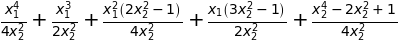

In [28]:
a = (x1**2 + x1 + x2**2 - 1)**2/(4*x2**2) + x1
b = (x1**2 + x1 + x2**2 - 1)**2/(4*x2**2) - x1
simplify(a)
together(a)
simplify(b)
together(b)
apart(a, x1)

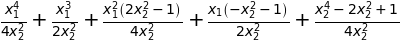

In [29]:
apart(b, x1)

In [12]:
F1X1 = diff(F1,x1)
F1X2 = diff(F1,x2)
F2X1 = diff(F2,x1)
F2X2 = diff(F2,x2)

J = Matrix([[F1X1,F1X2],[F2X1,F2X2]])
J

⎡           ⎛         0.5⎞ ⎛        d                    d         ⎞     -0.5 
⎢       1.0⋅⎝x₂ - │x₁│   ⎠⋅⎜re(x₁)⋅───(re(x₁)) + im(x₁)⋅───(im(x₁))⎟⋅│x₁│    ⋅
⎢                          ⎝       dx₁                  dx₁        ⎠          
⎢2⋅x₁ - ──────────────────────────────────────────────────────────────────────
⎢                                             x₁                              
⎢                                                                             
⎢                                      2   3          3                       
⎣                               - 21⋅x₁ ⋅x₂  + 2⋅x₁⋅x₂                        

                                  ⎤
sign(x₁)                          ⎥
                           0.5    ⎥
────────      2⋅x₂ - 2⋅│x₁│       ⎥
                                  ⎥
                                  ⎥
                 3   2       2   2⎥
          - 21⋅x₁ ⋅x₂  + 3⋅x₁ ⋅x₂ ⎦

In [30]:
F1X1A = diff(F1x1a,x1)
F1X1B = diff(F1x1b,x1)
F1X2A = diff(F1x1a, x2)
F1X2B = diff(F1x1b, x2)

Ja = Matrix([[F1X1A,F1X2A],[F2X1,F2X2]])
Ja

⎡  3       2      ⎛    2    ⎞       2           4      3     2     2 ⎛    2   
⎢x₁    3⋅x₁    x₁⋅⎝2⋅x₂  - 1⎠   3⋅x₂  - 1     x₁     x₁    x₁    x₁ ⋅⎝2⋅x₂  - 
⎢─── + ───── + ────────────── + ─────────  - ───── - ─── + ─── - ─────────────
⎢  2       2           2              2          3     3    x₂            3   
⎢x₂    2⋅x₂        2⋅x₂           2⋅x₂       2⋅x₂    x₂               2⋅x₂    
⎢                                                                             
⎢               2   3          3                                              
⎣        - 21⋅x₁ ⋅x₂  + 2⋅x₁⋅x₂                                               

 ⎞             ⎛    2    ⎞       3            4       2    ⎤
1⎠   3⋅x₁   x₁⋅⎝3⋅x₂  - 1⎠   4⋅x₂  - 4⋅x₂   x₂  - 2⋅x₂  + 1⎥
── + ──── - ────────────── + ──────────── - ───────────────⎥
      x₂           3                2                3     ⎥
                 x₂             4⋅x₂             2⋅x₂      ⎥
                                                           ⎥
 

In [33]:
Jb = Matrix([[F1X1B,F1X2B],[F2X1,F2X2]])
Jb

⎡  3       2      ⎛    2    ⎞       2           4      3     2     2 ⎛    2   
⎢x₁    3⋅x₁    x₁⋅⎝2⋅x₂  - 1⎠   - x₂  - 1     x₁     x₁    x₁    x₁ ⋅⎝2⋅x₂  - 
⎢─── + ───── + ────────────── + ─────────  - ───── - ─── + ─── - ─────────────
⎢  2       2           2              2          3     3    x₂            3   
⎢x₂    2⋅x₂        2⋅x₂           2⋅x₂       2⋅x₂    x₂               2⋅x₂    
⎢                                                                             
⎢               2   3          3                                              
⎣        - 21⋅x₁ ⋅x₂  + 2⋅x₁⋅x₂                                              -

 ⎞           ⎛    2    ⎞       3            4       2    ⎤
1⎠   x₁   x₁⋅⎝- x₂  - 1⎠   4⋅x₂  - 4⋅x₂   x₂  - 2⋅x₂  + 1⎥
── - ── - ────────────── + ──────────── - ───────────────⎥
     x₂          3                2                3     ⎥
               x₂             4⋅x₂             2⋅x₂      ⎥
                                                         ⎥
      3   2  

In [4]:
def fun(x):
    f = np.zeros(2)
    f[0] = f1(x[0],x[1])
    f[1] = f2(x[0],x[1])
    return f 

def jac(x):
    JJ = J.subs({x1:x[0],x2:x[1]}).n()
    print(JJ[0,0], JJ[1,0], JJ[0,1], JJ[1,1])
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

In [37]:
def jacA(x):
    JJ = Ja.subs({x1:x[0],x2:x[1]}).n()
    print(JJ[0,0], JJ[1,0], JJ[0,1], JJ[1,1])
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

def jacB(x):
    JJ = Jb.subs({x1:x[0],x2:x[1]}).n()
    print(JJ[0,0], JJ[1,0], JJ[0,1], JJ[1,1])
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

In [42]:
def NEWTON(n, fun, jac, x0, pr=0, tol=1.0e-5): 
    x = np.zeros(n)
    b = np.zeros(n)
    A = np.zeros((n,n)) 
    dx = np.zeros(n)
    xStep = np.zeros((1000,n))
    Error=2
    i=0
    x[:]=x0[:]
    xStep[i][:]=x[:]
    while Error>tol and i<999:
        Error0=Error 
#        x0[:]=x[:]
        b=-fun(x)
        A=jac(x)
        print(A)
        dx = np.dot(linalg.pinv(A),b) # ошибка
        x[:]=x[:]+dx[:]
        Error=math.sqrt(np.dot(dx.T,dx))
        k=log(Error)/log(Error0)
        i=i+1
        xStep[i][:]=x[:]
        if pr>0:
            if i>1: print('итерация:\t%i \t%.6e \t ' %(i, Error), k)
            else:   print('итерация:\t%i \t%.6e \t ' %(i, Error))
    return x, xStep, i

1.37500000000000 0 0.937500000000000 0
[[1.375  0.9375]
 [0.     0.    ]]
итерация:	1 	1.802678e+00 	 
0.287274940271424 -47.2934052219580 0.453745837984261 73.6999838375793
[[  0.28727494   0.45374584]
 [-47.29340522  73.69998384]]
итерация:	2 	2.941540e+00 	  1.83095580396573
-59.5209132540163 143.503142385463 110.880688409973 730.848909463086
[[-59.52091325 110.88068841]
 [143.50314239 730.84890946]]
итерация:	3 	8.015290e-01 	  -0.205048982169989
-33.0048163565550 57.4451219004209 49.2454506603938 271.601838157538
[[-33.00481636  49.24545066]
 [ 57.4451219  271.60183816]]
итерация:	4 	7.920376e-01 	  1.05384455381404
-10.7496529298987 21.8919243090673 8.89526059409721 87.6296001295150
[[-10.74965293   8.89526059]
 [ 21.89192431  87.62960013]]
итерация:	5 	1.133958e+00 	  -0.539207331144932
1.91126274849852 6.02483320471222 1.44475028340930 12.0777662011366
[[ 1.91126275  1.44475028]
 [ 6.0248332  12.0777662 ]]
итерация:	6 	4.526424e+00 	  12.0108261567222
-21.7394007678105 -4170.81

4200.94928505267 -148394.370471231 -25939.1616396313 -1810520.48113167
[[    4200.94928505   -25939.16163963]
 [ -148394.37047123 -1810520.48113167]]
итерация:	46 	3.194790e+00 	  0.889440238247927
4663.71596966444 -55919.9548784361 -32352.0094033986 -763721.674200970
[[   4663.71596966  -32352.0094034 ]
 [ -55919.95487844 -763721.67420097]]
итерация:	47 	2.777184e+00 	  0.879396280974083
5222.77981034950 -21030.5888400236 -40827.0439890327 -322507.761125052
[[   5222.77981035  -40827.04398903]
 [ -21030.58884002 -322507.76112505]]
итерация:	48 	2.423522e+00 	  0.866643274356958
5890.98950956662 -7896.55764322000 -52019.6798943206 -136303.083526798
[[   5890.98950957  -52019.67989432]
 [  -7896.55764322 -136303.0835268 ]]
итерация:	49 	2.122118e+00 	  0.849973035461484
6683.58726105478 -2961.10280045033 -66796.1036394100 -57638.7100196466
[[  6683.58726105 -66796.10363941]
 [ -2961.10280045 -57638.71001965]]
итерация:	50 	1.863811e+00 	  0.827500024810264
7618.72050080768 -1109.0280500

-72247964588.0356 -1.37381499020615e+18 -27589904845765.2 1.04926575138055e+21
[[-7.22479646e+10 -2.75899048e+13]
 [-1.37381499e+18  1.04926575e+21]]
итерация:	92 	1.376202e+04 	  0.987790237795496
-83878638289.2587 -5.10729653096353e+17 -36607150503621.6 4.45798243714708e+20
[[-8.38786383e+10 -3.66071505e+13]
 [-5.10729653e+17  4.45798244e+20]]
итерация:	93 	1.223281e+04 	  0.987639568693210
-97381954469.0532 -1.89868760806341e+17 -48571722778885.6 1.89404982478669e+20
[[-9.73819545e+10 -4.85717228e+13]
 [-1.89868761e+17  1.89404982e+20]]
итерация:	94 	1.087355e+04 	  0.987485069441389
-113059393168.888 -7.05855260725995e+16 -64446973458658.2 8.04719632148583e+19
[[-1.13059393e+11 -6.44469735e+13]
 [-7.05855261e+16  8.04719632e+19]]
итерация:	95 	9.665332e+03 	  0.987326611122207
-131260973990.273 -2.62408291007475e+16 -85511132388600.2 3.41899066759230e+19
[[-1.31260974e+11 -8.55111324e+13]
 [-2.62408291e+16  3.41899067e+19]]
итерация:	96 	8.591376e+03 	  0.987164051146314
-152393071

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


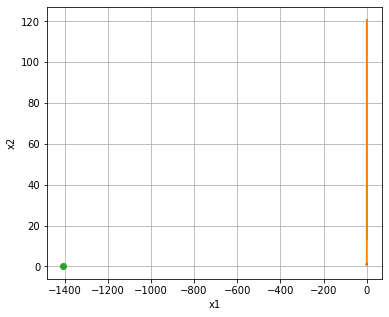

In [46]:
x10=0
x20=2

X0 = np.array([x10, x20])
#sol, xStep, iStep = NEWTON(2, fun, jac, X0, pr=1, tol=1.0e-10)
solA, xStepA, iStepA = NEWTON(2, fun, jacA, X0, pr=1, tol=1.0e-10)
#solB, xStepB, iStepB = NEWTON(2, fun, jacB, X0, pr=1, tol=1.0e-10)

A = -2
B = 2
N = 1000
f1p = np.zeros((N))
f2p = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    f1p[i] = f1r(x[i])
    f2p[i] = f2r(x[i])

plt.figure(figsize=(6,5))
plt.plot(x, f1p, x, f2p)
plt.plot(solA[0], solA[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

-856.000000000000 2120.00000000000 3960.00000000000 21300.0000000000
[[ -856.  3960.]
 [ 2120. 21300.]]
итерация:	1 	1.250819e+00 	 
-900.177872569010 801.559875508160 4581.40922216266 8953.95516942199
[[-900.17787257 4581.40922216]
 [ 801.55987551 8953.95516942]]
итерация:	2 	1.063588e+00 	  0.275461131073017
-965.029792490363 300.637070483214 5441.61751371878 3769.45049688705
[[-965.02979249 5441.61751372]
 [ 300.63707048 3769.45049689]]
итерация:	3 	9.118638e-01 	  -1.49664117293612
-1053.78072749797 111.369238781211 6628.60096993795 1582.73602350960
[[-1053.7807275   6628.60096994]
 [  111.36923878  1582.73602351]]
итерация:	4 	7.937325e-01 	  2.50376374153665
-1173.21016015701 40.1831234632528 8298.16295633635 654.939015586432
[[-1173.21016016  8298.16295634]
 [   40.18312346   654.93901559]]
итерация:	5 	7.169031e-01 	  1.44070120902889
-1341.76862919670 13.4841691498235 10818.8212335290 257.019510700093
[[-1341.7686292  10818.82123353]
 [   13.48416915   257.0195107 ]]
итерация:

8397604636.39386 145214964726.304 4821642323975.92 -166741587039489.
[[ 8.39760464e+09  4.82164232e+12]
 [ 1.45214965e+11 -1.66741587e+14]]
итерация:	47 	7.075624e+02 	  0.982366113766313
9749487957.97846 53985612386.3145 6397501487464.85 -70842661456091.6
[[ 9.74948796e+09  6.39750149e+12]
 [ 5.39856124e+10 -7.08426615e+13]]
итерация:	48 	6.289422e+02 	  0.982049738885550
11319011003.7967 20069894501.4992 8488404329014.25 -30098552291849.3
[[ 1.13190110e+10  8.48840433e+12]
 [ 2.00698945e+10 -3.00985523e+13]]
итерация:	49 	5.590582e+02 	  0.981721762807407
13141207435.8932 7461268213.50754 11262679314603.7 -12787807581997.6
[[ 1.31412074e+10  1.12626793e+13]
 [ 7.46126821e+09 -1.27878076e+13]]
итерация:	50 	4.969396e+02 	  0.981381546144643
15256749766.0627 2773836289.16914 14943666007499.7 -5433082166364.87
[[ 1.52567498e+10  1.49436660e+13]
 [ 2.77383629e+09 -5.43308217e+12]]
итерация:	51 	4.417234e+02 	  0.981028398924694
17712856709.5643 1031216182.12984 19827691840166.8 -23083204

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


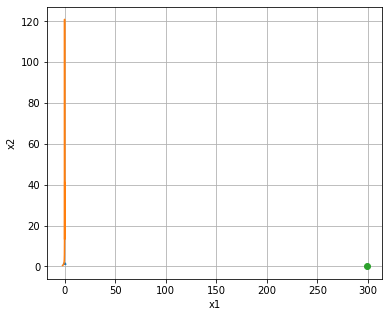

In [47]:
x10=-10
x20=-1

X0 = np.array([x10, x20])
#sol, xStep, iStep = NEWTON(2, fun, jac, X0, pr=1, tol=1.0e-10)
#solA, xStepA, iStepA = NEWTON(2, fun, jacA, X0, pr=1, tol=1.0e-10)
solB, xStepB, iStepB = NEWTON(2, fun, jacB, X0, pr=1, tol=1.0e-10)

A = -2
B = 2
N = 1000
f1p = np.zeros((N))
f2p = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    f1p[i] = f1r(x[i])
    f2p[i] = f2r(x[i])

plt.figure(figsize=(6,5))
plt.plot(x, f1p, x, f2p)
plt.plot(solB[0], solB[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

-856.000000000000 2120.00000000000 3960.00000000000 21300.0000000000
-856.000000000000 2120.00000000000 3960.00000000000 21300.0000000000
87.8642949630796 0.0241425781935049 213.055406749909 -0.185705117621948
61.4916240308842 0.0266504334629697 119.407341398034 -0.180693172369241
-1.52640469798188 0.318788737582753 0.297144801439695 -0.307081242519296
4.42046570700838 3.78794168013239 1.80955699730501 -5.91616743599028
2.92442305767688 12.7420086962638 0.594419456580125 -14.7823116906800
1.26300449325518 20.4712460294724 -0.346178751020507 -15.9401596169642
    fjac: array([[-0.27181517, -0.96234948],
       [ 0.96234948, -0.27181517]])
     fun: array([ 3.86574763, -1.09272031])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 62
    njev: 7
     qtf: array([-0.02444307,  4.01754282])
       r: array([-21.44863437,  16.07960429,   0.31195044])
  status: 5
 success: False
       x: array([ 0.91061546, -1.

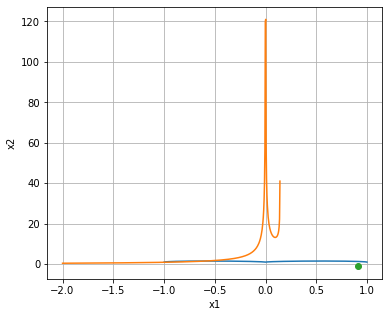

In [52]:
SOLB = root(fun, X0, jac=jacB, method='hybr')
print(SOL)

plt.figure(figsize=(6,5))
plt.plot(x, f1p, x, f2p)
plt.plot(SOL.x[0], SOL.x[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

Статус: `задание не решено`.

# Задание 5

Напишите программу, реализующую метод [золотого сечения](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F).

In [109]:
def f(x):
    return x ** 2

In [110]:
def lf(a, b, epsilon, phi):
    while abs(b - a) >= epsilon:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2:
            a = x1
        else:
            b = x2
    return (a + b) / 2

In [111]:
def hf(a, b, epsilon, phi):
    while abs(b - a) >= epsilon:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        y1 = f(x1)
        y2 = f(x2)
        if y1 <= y2:
            a = x1
        else:
            b = x2
    return (a + b) / 2

In [112]:
a = float(input('Задайте начало отрезка: '))
b = float(input('Задайте конец отрезка: '))
epsilon = float(input('Задайте точность вычислений: '))

phi = 0.5*(1 + 5 ** 0.5)

print('Минимум равен', f(lf(a, b, epsilon, phi)))
print('Максимум равен', f(hf(a, b, epsilon, phi)))

Задайте начало отрезка: 6
Задайте конец отрезка: 13
Задайте точность вычислений: 0.0001
Минимум равен 36.00040508591804
Максимум равен 168.9991223174528


# Задание 6

Найти все максимумы и минимумы рассматриваемой функции $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$ на отрезке [-1.0;25]. Определить глобальный максимум (наибольший локальный максимум) и минимум на этом отрезке.

In [113]:
def f(x):
    return (1 + x + x ** 2) * exp(-x) + sin(x + 0.1) - 1

<IPython.core.display.Javascript object>


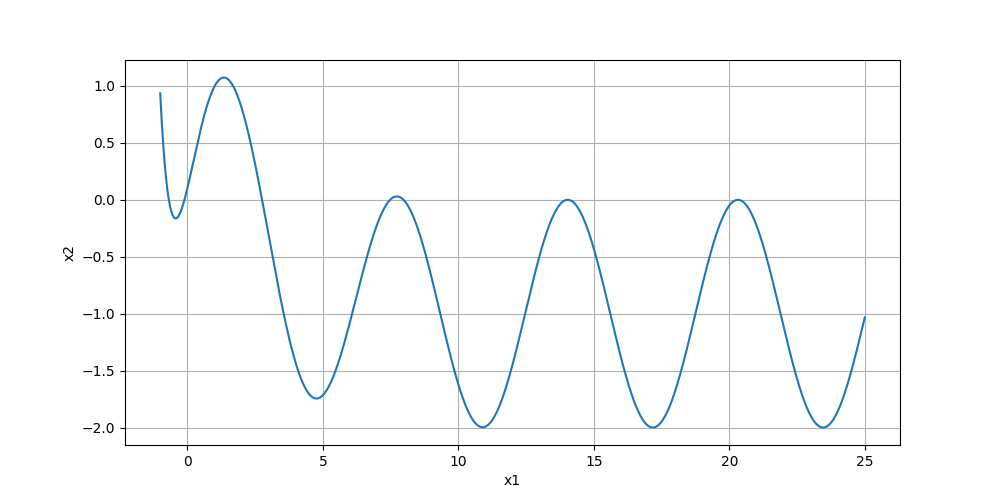

In [114]:
A = -1
B = 25
N = 1000
fp = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    fp[i] = f(x[i])

plt.figure(figsize = (10,  5))
plt.plot(x, fp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [115]:
epsilon = float(input('Задайте точность вычислений: '))

phi = .5 * (1 + 5 ** .5)

mx = []
mn = []

# 1
mx.append(f(hf(-1, 0, epsilon, phi)))
mn.append(f(lf(-1, 0, epsilon, phi)))

# 2
mx.append(f(hf(0, 2, epsilon, phi)))
mn.append(f(lf(4, 5, epsilon, phi)))

#3
mx.append(f(hf(6, 8, epsilon, phi)))

# 4
mn.append(f(lf(10, 12, epsilon, phi)))
mx.append(f(hf(13, 15, epsilon, phi)))

# 5
mn.append(f(lf(16, 18, epsilon, phi)))

# 6
mx.append(f(hf(19, 21, epsilon, phi)))
mn.append(f(lf(22, 24, epsilon, phi)))
mx.append(f(hf(24, 25, epsilon, phi)))

print('Максимумы:', mx)
print('Минимумы:', mn)

print('\nГлобальный максимум:', max(mx))
print('Глобальный минимум:', min(mn))

Задайте точность вычислений: 0.001
Максимумы: [0.933190872988311, 1.07439448437497, 0.0298074977260141, 0.000169926093185557, 6.38157711785325e-7, -1.03310174033600]
Минимумы: [-0.163567320605132, -1.74572933453245, -1.99758047469215, -1.99998913776233, -1.99999995316566]

Глобальный максимум: 1.07439448437497
Глобальный минимум: -1.99999995316566


# Домашнее задание (дополнительное):

# Задание. Определитель.

Напишите программу для вычисления определителя матрицы произвольной размерности [методом разложения](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C) по строке или столбцу.

In [123]:
def getMinor(matrix, i1, j1):
    minor = np.zeros((len(matrix) - 1, len(matrix) - 1))
    i2 = 0
    for i in range(len(matrix)):
        j2 = 0
        if i == i1:
            continue
        for j in range(len(matrix)):
            if j == j1:
                continue
            minor[i2][j2] = matrix[i][j]
            j2 += 1
        i2 += 1
    return minor

In [125]:
matrix = np.array([[1, 2, 3],
                   [3, 4, 5],
                   [5, 6, 7]])
getMinor(matrix, 0, 0)

array([[4., 5.],
       [6., 7.]])

In [154]:
def determinant_R(matrix):
    if len(matrix) == 1:
        return matrix[0][0]
    s = 0
    for i in range(len(matrix)):
        s += (-1) ** i * matrix[0][i] * determinant_R(getMinor(matrix, 0, i))
    return s

In [158]:
K = np.eye(3)
A = np.array([[1, 2, 3],
              [3, 4, 5],
              [5, 6, 7]])
print(determinant_R(K))
print(determinant_R(A))

1.0
0.0


# Задание. Области притяжения.

Как мы уже поняли, у каждого корня есть своя область притяжения (окрестность, выбирая начальное приближение из которой, можно получить этот корень с помощью итерационного метода, например, метода Ньютона). Постройте для системы уравнений из задания 4 область притяжения каждого корня.

Статус: `задание не решено`.